# Regularized Regressions 


## Problem 1
Generate NxK draws from the standard normal.
___

In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNetCV

n = 50

x0 = np.random.normal(size = n) 
x1 = np.random.normal(size = n) 
x2 = np.random.normal(size = n) 
x3 = np.random.normal(size = n) 
x4 = np.random.normal(size = n) 
x5 = np.random.normal(size = n)

df = pd.DataFrame({"x0":x0, "x1":x1, "x2":x2,"x3":x3,"x4":x4,"x5":x5})
df.head()

,x0,x1,x2,x3,x4,x5
0,-0.972710,1.426425,1.798072,0.546822,-0.585188,-0.690882
1,-0.944377,1.950188,0.399008,0.170865,-1.463335,-0.242705
2,-1.313322,0.256001,-0.113697,-0.169299,-2.080553,-1.023094
3,0.600896,-2.288892,-0.764843,-0.322443,-0.926542,-1.123037
4,-0.382337,0.006138,-0.230069,0.361138,1.130918,-0.397052


## Problem 2
Generate your outcome by making up a function, like $y = 0.8*x_3 - 0.02*x_8 + ... + \epsilon$.  You can vary how many predictors are in there, but 4 or 5 is fine.  Epsilon is some random noise (the larger the standard deviation of the normal noise, the more data you'll need to get good estimates).

I'm going to create the outcome variable using the following linear model:

$$y = 0.3*x_0 -0.08*x_1 + 0.1*x_2 + 0.5*x_3 - 0.84*x_4 + 0.07*x_5 + \epsilon$$
Where
$$\epsilon \sim Normal(0, 2)$$
___

In [137]:
df["y"] = 0.3*df["x0"]  -0.08*df["x1"] + 0.1*df["x2"] + 0.5*df["x3"]  -0.84*df["x4"] + 0.07*df["x5"] + pd.Series(np.random.normal(scale = 2, size = n))

## Problem 3
Compare the out-of-sample performance of LASSO, Ridge, OLS, and Elastic Net, using k-fold cross validation

___

I used 5-fold cross-validation to evaluate the performance of all the models. This means that, in the training data, I create 5 fold of data. I train the model with 4 folds, and try to predict the values in the fourht fold of data. Each time I predict the values of the excluded fold, I compute the permormance of the model by $R^2$ that is by 

$$R^{2} = 1 - \frac{\sum_{i = 1}^{800}(y_{i} - \hat{y_{i}})^2}{\sum_{i = 1}^{800} (y_{i} - \bar{y})^{2}}$$



where $y_{i}$ is the response variable at row $i$, $\hat{y}$ is the average value of the response variable in the whole trained data, and 

 I later report the mean and standard deviation of the five performance scores. The better model is the one with the highest mean and sd.


In [138]:
X = df.drop(['y'], axis = 1)
Y = df['y']

### 3.1 LASSO

In [139]:
lasso = linear_model.LassoCV(max_iter = 6000)
lasso.fit(X, Y)
lasso_scores = lasso.score(X,Y)
lasso_scores

print(f'k-fold cross validation score is : {round(np.mean(lasso_scores), 3)}')

k-fold cross validation score is : 0.315


### 3.2 Ridge regression

In [140]:
ridge = RidgeCV()
ridge.fit(X,Y)
ridge_scores = ridge.score(X,Y)
ridge_scores
print(f'k-fold cross validation score is : {round(np.mean(ridge_scores), 3)}')

k-fold cross validation score is : 0.31


### 3.3 OLS

In [141]:
ols = LinearRegression().fit(X, Y)

#ols_pred = ols.predict(X)
## 5 fold cross validation ( the default method)
ols_scores = cross_val_score(ols, X,Y)
ols_scores
print(f'5-fold cross validation score is : {round(np.mean(ols_scores), 3)} with sd: {round(np.std(ols_scores), 3)}')

5-fold cross validation score is : -0.5 with sd: 0.287


### 3.4 Elastic Net

In [142]:
en = ElasticNetCV()
en.fit(X, Y)
en_pred = en.predict(X)

en_scores = en.score(X,Y)
en_scores
print(f'k-fold cross validation score is : {round(np.mean(en_scores), 3)}')


k-fold cross validation score is : 0.284


### 3.5 Comment

According to the $R^2$ measure of performance, the model that explains the most out-of-sample variance is the ridge model ($R^2 = 0.278$) followed by the lasso ($R^2 = 0.268$) and elastic net ($R^2 = 0.251$) performs a bit but worst, and ols is the worst of all the models ($R^2 = -0.43$). The $R^2$ is very small for the OLS, but the standard deviation of the scores you get with 5 folds is very big, so the scores does not seem to be very informative for the OLS.

## Problem 4

Run multiple simulations (both at testing and training) to get a handle of the uncertainty and level of noise you're encountering.  Try varying N, K, the number of folds, etc.  Be sure to do some with N very small, (maybe as little as 2x or 3x K.  Some environments like genetics have K > N!)
____

### 4.1 Simulation 1: Change the number of observation in the data

The following simulation will explore what happens when the data set increases form $N = 15$ to $N = 500$ holding the number of variables $k$ constant to k = 5.
___

In [143]:
start = 15
N = 500

est_lasso = []
est_ridge = []
est_ols = []
est_en = []

for size in range(start, N):
    # Create a new data set each round
    x0 = np.random.normal(size = size) 
    x1 = np.random.normal(size = size) 
    x2 = np.random.normal(size = size) 
    x3 = np.random.normal(size = size) 
    x4 = np.random.normal(size = size) 
    x5 = np.random.normal(size = size)

    df = pd.DataFrame({"x0":x0, "x1":x1, "x2":x2,"x3":x3,"x4":x4,"x5":x5})

    df["y"] = 0.3*df["x0"] -0.08*df["x1"] + 0.1*df["x2"] + 0.5*df["x3"]  -0.84*df["x4"] + 0.07*df["x5"] + pd.Series(np.random.normal( scale = 2, size = size))
    
    # get the dependent and independent variables separetly
    X = df.drop(['y'], axis =1)
    Y = df["y"]
    # Fit the regression using the most efficient number of cross validation folds and use this number of folds to get the performance score
    lasso = linear_model.LassoCV(max_iter = 6000)
    lasso.fit(X,Y)
    lasso_scores = lasso.score(X,Y)

    ridge = RidgeCV()
    ridge.fit(X, Y)
    ridge_scores = ridge.score(X,Y)

    ols = LinearRegression().fit(X, Y)

    ols_scores = cross_val_score(ols, X, Y)
    en = ElasticNetCV()
    en.fit(X, Y)

    ## 5 fold cross validation ( the default method)
    en_scores = en.score(X,Y) 

    est_lasso.append(lasso_scores)
    est_ridge.append(ridge_scores)
    est_ols.append(ols_scores)
    est_en.append(en_scores)

In [144]:
def get_mean(estimate):
  '''
  For the OLS model get the mean of the 5 fold scores'
  '''
  means = np.array([*map(np.mean, estimate)])
  sds = np.array([*map(np.std, estimate)])
  lower_bound = means - sds
  upper_bound = means + sds
  return means, sds, lower_bound, upper_bound

mean_ols, sds_ols, lb_ols, up_ols =  get_mean(est_ols)

Text(0.5, 1.0, 'Lasso regression performance as N increases')

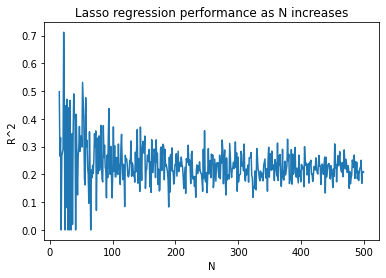

In [145]:
x_axis = np.linspace(start, N, len(est_lasso))

sns.lineplot(x = x_axis, y = est_lasso)
plt.ylabel('R^2')
plt.xlabel('N')
plt.title('Lasso regression performance as N increases')

Text(0, 0.5, 'R^2')

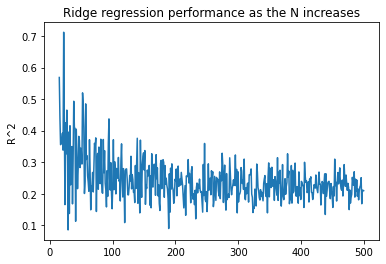

In [146]:
sns.lineplot(x = x_axis, y = est_ridge)
plt.title('Ridge regression performance as the N increases')
plt.ylabel('R^2')

Text(0.5, 0, 'N')

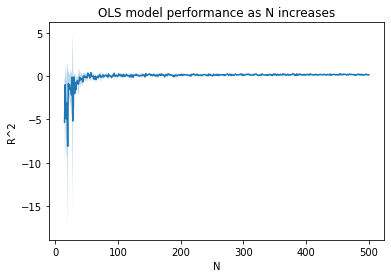

In [149]:
sns.lineplot(x = x_axis, y = mean_ols)
plt.fill_between(x_axis, lb_ols, up_ols, alpha = 0.3)
plt.ylabel('R^2')
plt.title('OLS model performance as N increases')
plt.xlabel('N')

(-1.0, 1.0)

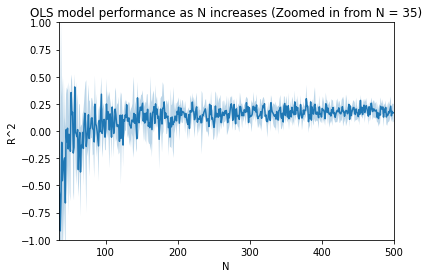

In [155]:
sns.lineplot(x = x_axis, y = mean_ols)
plt.fill_between(x_axis, lb_ols, up_ols, alpha = 0.3)
plt.ylabel('R^2')
plt.title('OLS model performance as N increases (zoomed in from N = 35)')
plt.xlabel('N')
plt.xlim([35, 500])
plt.ylim([-1,1])

Text(0.5, 0, 'N')

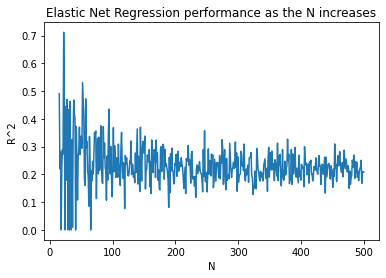

In [148]:
sns.lineplot(x = x_axis, y = est_en)
plt.title('Elastic Net Regression performance as the N increases')
plt.ylabel('R^2')
plt.xlabel('N')

#### 4.1.1 Comment

Ridge, Elastic Net, and Lasso follow a very similar pattern. There is a lot of variation with small Ns, and as the number of observation increases the variation lowers and tends to converge to a certain value. The values seem to be very similar (between 0 and 0.7), and the all seem to converge around $R^2 = 0.25$.

It is very different for the OLS model. This model has a huge variation with small Ns and has very poor performance achieving negative values of $R^2$. 

### 4.2 Simulation 2: change both $N$ and $k$

The following simulation studies what happens when the number of observations change, and we have very few variables (k = 2), a "medium" number of variables (k = 20), and a large number of observations. The number of rows starts at 15 and ends at 400.
___


In [ ]:
start = 15
N = 400

lasso_per = []
ridge_per = []
ols_per = []
en_per = []

def df_create(n,k):
    '''
    This function creates a data frame with n rows, and k variables
    '''
    cols = []
    col_names = []
    for var in range(k):
        cols.append(np.random.normal(size =n))
        col_names.append(f'x{var}')
    df = pd.DataFrame.from_records(np.transpose(cols), columns=col_names)
    return df

for k in [2, 20, 200]:

    for size in range(start, N):
        df = df_create(size,k)
        df['y'] = 0
        for col in range(len(df.columns) -1):
            df['y'] += np.random.normal(scale = 5)*df[f'x{col}']
            # add the random noise 
        df['y'] += pd.Series(np.random.normal( scale = 2, size = size))
        # Create a new data set each round
     
        # get the dependent and independent variables separetly
        X = df.drop(['y'], axis =1)
        Y = df["y"]
        # Fit the regression using the most efficient number of cross validation 
        # folds and use this number of folds to get the performance score
        lasso = linear_model.LassoCV(max_iter = 6000)
        lasso.fit(X,Y)
        lasso_scores = lasso.score(X,Y)

        ridge = RidgeCV()
        ridge.fit(X, Y)
        ridge_scores = ridge.score(X,Y)

        ols = LinearRegression().fit(X, Y)

        ols_scores = cross_val_score(ols, X, Y)
        en = ElasticNetCV()
        en.fit(X, Y)

        en_scores = en.score(X,Y) 

        lasso_per.append(lasso_scores)
        ridge_per.append(ridge_scores)
        ols_per.append(ols_scores)
        en_per.append(en_scores)

In [60]:
ols_av_per, ols_sds, up_bound, low_bound =  get_mean(ols_per)

plot_k = pd.DataFrame({'performance': lasso_per + ridge_per + ols_av_per.tolist() + en_per, 
                       'model': ['lasso']*len(lasso_per) + ['ridge']*len(ridge_per) + ['ols']*len(ols_av_per) + ['EN']*len(en_per),
'k': [2]*385 + [20]*385 + [200]*385 +[2]*385 + [20]*385 + [200]*385+[2]*385 + [20]*385 + [200]*385+[2]*385 + [20]*385 + [200]*385})
plot_k['N'] = [i for i in range(15, 400)]*12
plot_k['performance'] = pd.to_numeric(plot_k['performance'], errors = 'coerce')


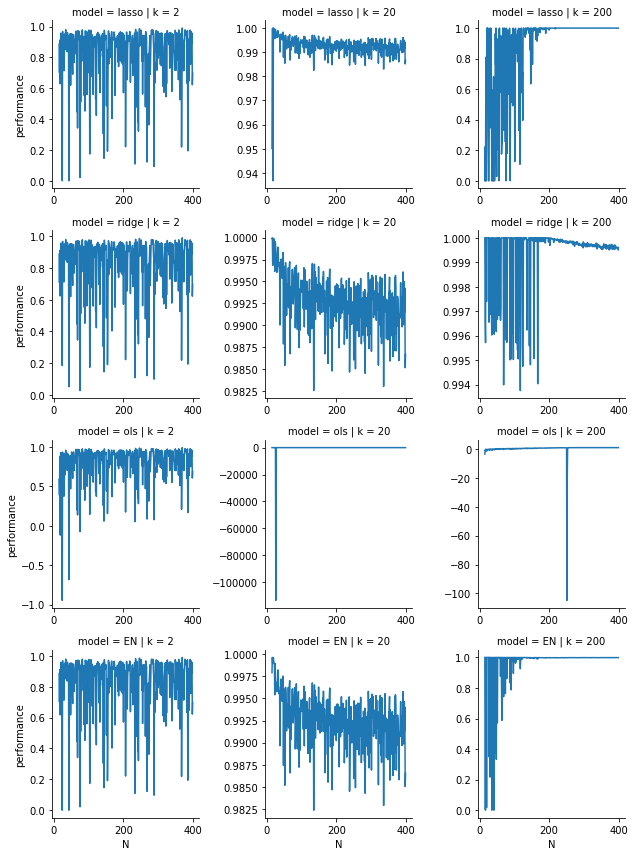

In [61]:
g = sns.FacetGrid(plot_k, col = 'k', row = 'model', sharey= False, sharex=False)
g.map(sns.lineplot, 'N', 'performance')

([<matplotlib.axis.XTick at 0x7f504d3aef90>,
 <a list of 11 Text major ticklabel objects>)

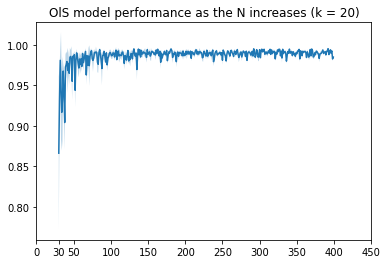

In [116]:
#[2]*385 + [20]*385 + [200]*385 
#print(len(ols_av_per.tolist()[30:]))
x_axis = [i for i in range(30, 400)]
plt.plot(x_axis, ols_av_per.tolist()[400:385*2])
plt.title('OlS model performance as the N increases (k = 20)')
plt.fill_between(x_axis, low_bound[400:385*2], up_bound[400:385*2], alpha = 0.3)
plt.xticks(list(plt.xticks()[0]) + [30] )

(0.0, 1.0)

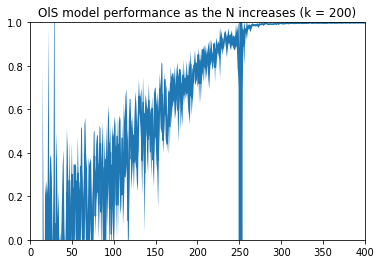

In [161]:
plt.plot([i for i in range(15, 400)], ols_av_per.tolist()[385*2:])
plt.title('OlS model performance as the N increases (k = 200)')
plt.fill_between([i for i in range(15, 400)], low_bound[385*2:], up_bound[385*2:])
plt.xlim([0,400])
plt.ylim([0,1])

#### 4.2.1 Comment

The grid graph shows that when we only have 2 variables, increasing the number of observation does not seem to increase predictive performance significantly for the lasso, ridge, and Elastic Nets regressions. There is a lot of variation, and a general tendency togards higher values of $R^2$.
The case of OLS is very different. Increasing observations helps a lot with performance, but only because the model is very bad with very few dat, as shown by the negative values on the y-axis on the OLS graphs.

When $k = 20$, all the regularized regressions do very well after collecting some data. The number of for $R^2$ has a lower bound at 0.98 for the ridge, and the elestic net regressions, and 0.94 for lasso.
The OLS regression follows a different pattern. The graph in the Facet is not clear so I zoomed in. It looks like with very few data points, the model has a very bad out-of-sample performance, unless $N > 50$. After that point, the model seems to get closer to the others.

When $k = 200$, the pattern is a very weird. The ridge model seems to be the best here because even with small data points the out-of-sample performance has a lower bound 0.994 with a lot of variation, but when the number of data points comes close to the number of variables, the out-of-sample performance converges to a value just below 1. Elastic Nets (EN), and Ridge do very poorly with small data points and there is a lot of variation. Lasso starts converging when the number of data points approaches the number of variables, while EN shows the same behavior but converges much more quickly. Finally, OLS has a very strange behavior. Again with small data, this regression is the worst of them all. As the size of the data incraeses, the performances also increases. Then there is a crazy thing around $N = 250$ that I don't understand. Even if this is a mistake, the general trend is to converge to a very high value of $R^2$ with N

I would use lasso when trying to predict with data sets that have N very close to k.

___

Do some extensions.  Some possible ideas:

   - Make some of the features correlated (generate some of the columns just like you generated the outcome: as a function of 1 or more other features + some random noise).  Does high correlation (less random noise) lead to problems in estimation or prediction?

   - Make some features binary.  Does having it unbalanced change the results much?

   - Add in quadratic and interaction effects.  This would require an additional K^2 predictors(!), so LASSO is probably the way to go.  Unless theoretically motivated, it's usually a good assumption that an interaction effect is only detectable if the individual effects are (i.e., don't bother looking for beta_3*x_1*x_2 if beta_2*x_2 and beta_1*x_1 both come up empty-handed ahead of time).  See how well doing LASSO works with all features and interactions, and then compare it to using LASSO with the just the K predictors to find the best predicting features, and then only create the interactions for those relevant ones.

    - Have outliers by having the outcome or some columns draw from a t-distribution.  You can tune how many/large the outliers are by changing the degrees of freedom on the t-distribution

    - Feel free to explore any other questions or ideas you want to investigate.

## 5. Extensions


### 5.1 Adding correlated variables.

In [ ]:
start = 15
N = 500

est_lasso = []
est_ridge = []
est_ols = []
est_en = []

for size in range(start, N):
    # Create a new data set each round
    df = df_create(size,k = 8)
    df['y'] = 0
    for col in range(len(df.columns) -1):
        df['y'] += np.random.normal(scale = 5)*df[f'x{col}']
    df['y'] += pd.Series(np.random.normal( scale = 2, size = size))
    #Create a correlated variables
    df['x9'] = 2*df['x1'] + 3.5*df['x6']
    df['x10'] = df['x0'] + 3*df['x4']
    
    # get the dependent and independent variables separetly
    X = df.drop(['y'], axis =1)
    Y = df["y"]
    # Fit the regression using the most efficient number of cross validation folds and use this number of folds to get the performance score
    lasso = linear_model.LassoCV(max_iter = 6000)
    lasso.fit(X,Y)
    lasso_scores = lasso.score(X,Y)

    ridge = RidgeCV()
    ridge.fit(X, Y)
    ridge_scores = ridge.score(X,Y)

    ols = LinearRegression().fit(X, Y)

    ols_scores = cross_val_score(ols, X, Y)
    en = ElasticNetCV()
    en.fit(X, Y)

    ## 5 fold cross validation ( the default method)
    en_scores = en.score(X,Y) 

    est_lasso.append(lasso_scores)
    est_ridge.append(ridge_scores)
    est_ols.append(ols_scores)
    est_en.append(en_scores)

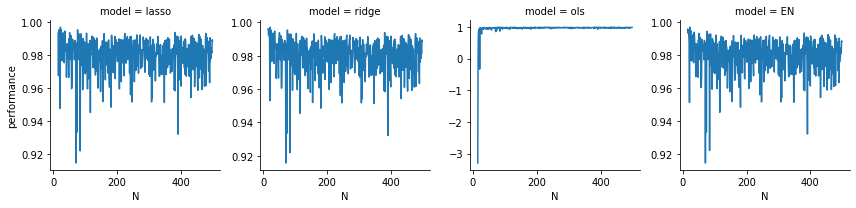

In [69]:
est_av_ols, b, c, d = get_mean(est_ols)
plot_2 = pd.DataFrame({'performance': est_lasso + est_ridge + est_av_ols.tolist() + est_en,
                       'model': ['lasso']*len(est_av_ols) + ['ridge']*len(est_av_ols) + ['ols']*len(est_av_ols) + ['EN']*len(est_av_ols)})

plot_2['N'] = [i for i in range(15, 500)]*4
g = sns.FacetGrid(plot_2, col = 'model', sharey= False, sharex=False)
g.map(sns.lineplot, 'N', 'performance')

Text(0, 0.5, 'R^2')

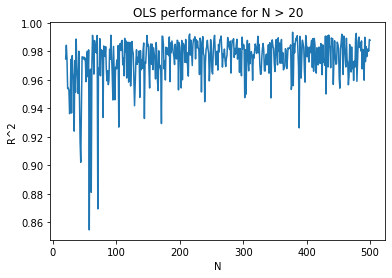

In [165]:
plt.plot(np.linspace(20, 500, 465),est_av_ols.tolist()[20:], '-')
plt.title('OLS performance for N > 20')
plt.xlabel('N')
plt.ylabel('R^2')

### 5.1.1 Comment

When there are variables that are correlated and $k = 11$, the performance for the regularized regressions have some variation which reduces as N increases, but the variation is higher than when you don't have correlated variables.

The OLS is not that bad as before, surprisingly, but it is still worst than the other regressions.